___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [45]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib as plt 
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [6]:
start = datetime.datetime( 2006,1,1)

end = datetime.datetime( 2016,1,1)

In [8]:
df = data.DataReader('BAC','stooq', start , end )

In [15]:
df2 = data.DataReader('C','stooq', start , end )

In [16]:
df3 = data.DataReader('GS','stooq', start , end )

In [17]:
df4 = data.DataReader('JPM','stooq', start , end )

In [18]:
df5 = data.DataReader('MS','stooq', start , end )

In [19]:
df6 = data.DataReader('WFC','stooq', start , end )

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [20]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [22]:
bank_stocks = pd.concat([df,df2,df3,df4,df5,df6], axis =1 , keys = tickers)

** Set the column name levels (this is filled out for you):**

In [27]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [28]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   41.442  41.668  40.760  41.582  18450929.0  440.07  443.45   
2006-01-04   41.512  41.726  41.026  41.141  20105410.0  438.82  440.96   
2006-01-05   41.141  41.362  40.912  41.194  16782641.0  435.02  438.07   
2006-01-06   41.334  41.432  40.940  41.132  14259661.0  438.98  439.15   
2006-01-09   41.265  41.486  40.947  41.159  17684099.0  436.45  437.71   

Bank Ticker                                ...          MS                  \
Stock Info      Low   Close     Volume     ...        Open    High     Low   
Date                                       ...                               
2006-01-03   432.05  442.67  1712139.0     ...      40.034  40.954  39.727   
2006-01-04   434.20  434.48  2083320.0     ...      41.106  41.510  40.860   
2006-01-05   434.66  436.62  1264127.0     ...      40.860  41.028  40.622   
2006-01-06   432.87  436.62  1525744.0     ...      41.154  41.205  40.649   
2006-01-09   433.75  434.57  1871527.0     ...      41.051  41.518  41.043   

Bank Ticker                        WFC                                      
Stock Info    Close     Volume    Open    High     Low   Close      Volume  
Date                                                                        
2006-01-03   40.827  6374568.0  23.702  23.986  23.403  23.927  14687538.0  
2006-01-04   40.860  9457881.0  23.849  23.864  23.520  23.649  14492354.0  
2006-01-05   40.971  6849966.0  23.626  23.664  23.482  23.626  13507351.0  
2006-01-06   41.012  8168027.0  23.689  23.829  23.545  23.760  11204308.0  
2006-01-09   41.441  4913405.0  23.760  23.864  23.664  23.760   7492296.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [36]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     48.487
C      506.600
GS     213.890
JPM     61.008
MS      62.530
WFC     49.079
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [38]:
returns =  pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [39]:
for tick in tickers :
    returns[tick+'Retrun'] = bank_stocks[tick]['Close'].pct_change()

In [40]:
returns.head()

,BACRetrun,CRetrun,GSRetrun,JPMRetrun,MSRetrun,WFCRetrun
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010606,-0.018501,-0.013582,-0.014228,0.000808,-0.011619
2006-01-05,0.001288,0.004925,-0.000365,0.003051,0.002717,-0.000973
2006-01-06,-0.001505,0.000000,0.013865,0.007064,0.001001,0.005672
2006-01-09,0.000656,-0.004695,0.012146,0.016236,0.010460,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

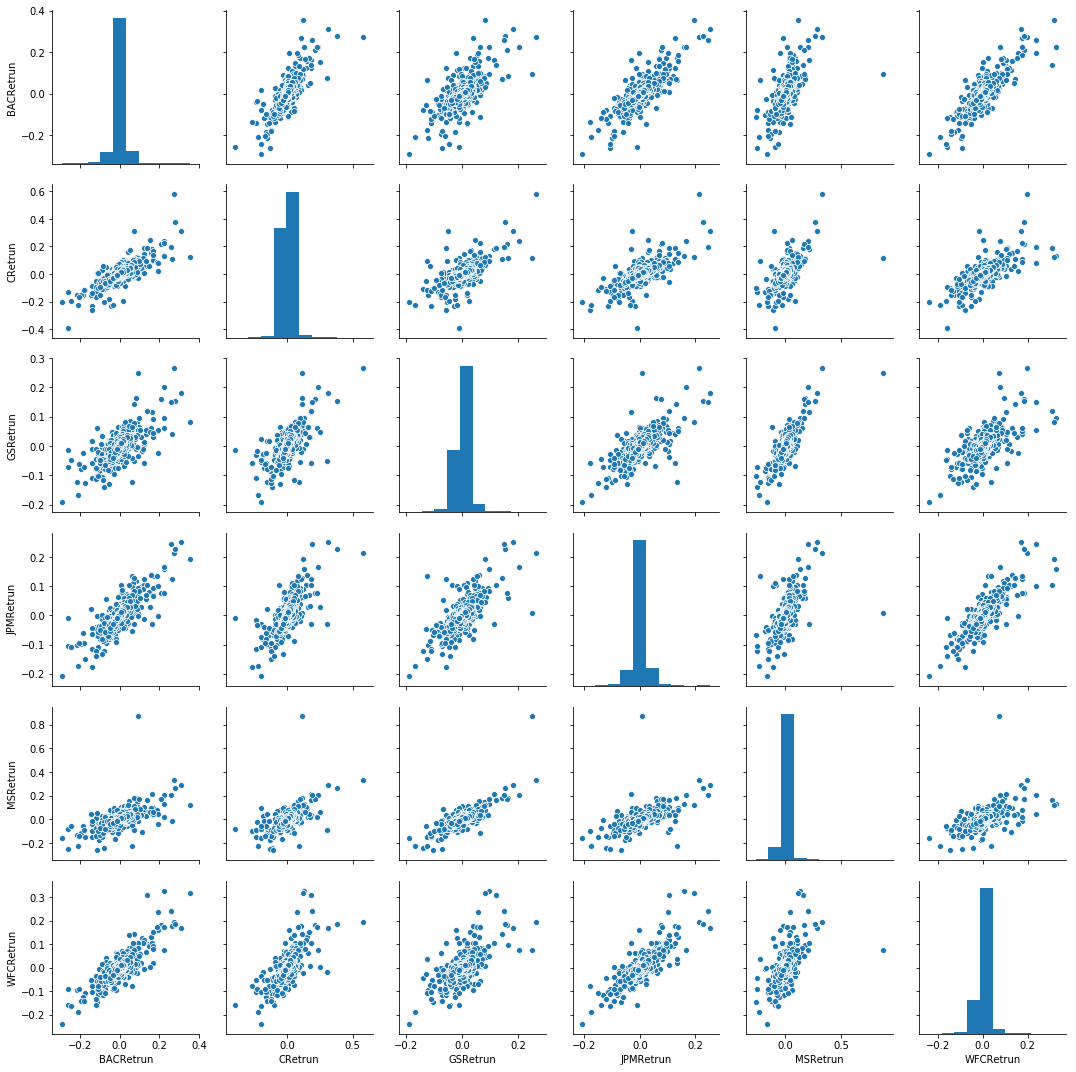

In [48]:
sns.pairplot(returns[1:])


* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [49]:
returns.head()

,BACRetrun,CRetrun,GSRetrun,JPMRetrun,MSRetrun,WFCRetrun
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010606,-0.018501,-0.013582,-0.014228,0.000808,-0.011619
2006-01-05,0.001288,0.004925,-0.000365,0.003051,0.002717,-0.000973
2006-01-06,-0.001505,0.000000,0.013865,0.007064,0.001001,0.005672
2006-01-09,0.000656,-0.004695,0.012146,0.016236,0.010460,0.000000


In [53]:
returns.idxmin()

BACRetrun   2009-01-20
CRetrun     2009-02-27
GSRetrun    2009-01-20
JPMRetrun   2009-01-20
MSRetrun    2008-10-09
WFCRetrun   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [55]:
returns.idxmax()

BACRetrun   2009-04-09
CRetrun     2008-11-24
GSRetrun    2008-11-24
JPMRetrun   2009-01-21
MSRetrun    2008-10-13
WFCRetrun   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [56]:
returns.std() # Citigroup riskiest

BACRetrun    0.036604
CRetrun      0.038616
GSRetrun     0.025370
JPMRetrun    0.027668
MSRetrun     0.037705
WFCRetrun    0.030220
dtype: float64

In [58]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACRetrun    0.016147
CRetrun      0.015279
GSRetrun     0.014028
JPMRetrun    0.013965
MSRetrun     0.016009
WFCRetrun    0.012548
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


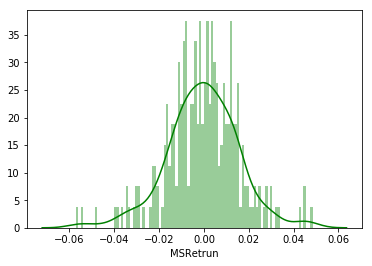

In [61]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSRetrun'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

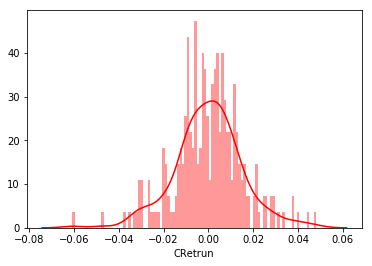

In [62]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['CRetrun'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

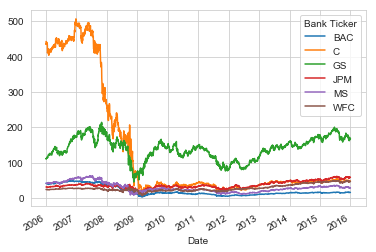

In [68]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

** Create a heatmap of the correlation between the stocks Close Price.**

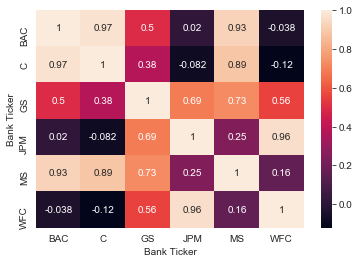

In [71]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

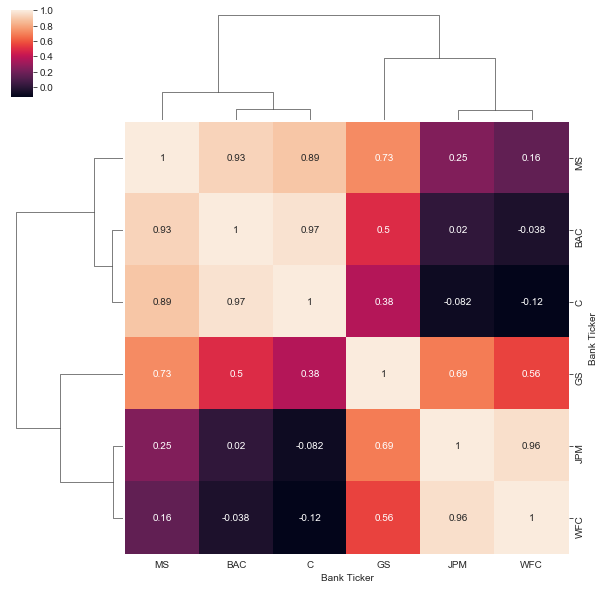

In [72]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)